In [1]:
import geopandas 
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom
from   matplotlib.pyplot import imread

%matplotlib inline

In [2]:
hispaniola_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/hispaniola.shp')
división_prov_muni_y_dist_muni = geopandas.read_file('../shape_files/rd_shapes/vectores/División_Prov_Muni_y_Dist_MuniUTM.shp')
limite_gdf                     = geopandas.read_file('../shape_files/rd_shapes/vectores/limite_frontera.shp')
fay_gdf                        = geopandas.read_file('../shape_files/rd_shapes/vectores/FAY.shp')
silueta_haiti_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_haiti.shp')
silueta_rd_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_rd.shp')
PROVINCIAS_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/PROVINCIAS.shp')
RIOS_gdf                       = geopandas.read_file('../shape_files/rd_shapes/vectores/RIOS.shp')
cuencas_hidro_gdf              = geopandas.read_file('../shape_files/rd_shapes/cuencas_hidrograficas_rd/Cuencas_Hidrograficas_RD.shp')
cuencas_presas_gdf             = geopandas.read_file('../shape_files/rd_shapes/cuencas_presas/Presas-CuencasAporte.shp')




hispaniola_gdf                 = hispaniola_gdf.to_crs("EPSG:4326")
división_prov_muni_y_dist_muni = división_prov_muni_y_dist_muni.to_crs("EPSG:4326")
limite_gdf                     = limite_gdf.to_crs("EPSG:4326") 
fay_gdf                        = fay_gdf.to_crs("EPSG:4326") 
silueta_haiti_gdf              = silueta_haiti_gdf.to_crs("EPSG:4326") 
silueta_rd_gdf                 = silueta_rd_gdf.to_crs("EPSG:4326") 
PROVINCIAS_gdf                 = PROVINCIAS_gdf.to_crs("EPSG:4326")
RIOS_gdf                       = RIOS_gdf.to_crs("EPSG:4326")
cuencas_hidro_gdf              = cuencas_hidro_gdf.to_crs("EPSG:4326")
cuencas_presas_gdf             = cuencas_presas_gdf.to_crs("EPSG:4326")

In [3]:
cuencas_presas_gdf = cuencas_presas_gdf.drop(columns=['ACUEDUCTM3', 'AREA', 'PERIMETER', 'ACRES', 
                                                      'HECTARES', 'Km', 'ENCLOSED_A', 'ISLAND_ARE', 'Id', 'LAYER',
                                                      'GM_TYPE', 'PROPOSITO', 'RIEGO_HA', 'POTENCIA_M', 'OPERACIO_1',
                                                      'GEN_GWH_A', 'REGION_HID', 'COTA_OPERA', 'ENCLOSED_1', 
                                                      'ENCLOSED_2', 'ELEVATION', 'NAME', 'GM_LAYER', 'TIPO_PRESA',
                                                      'ALTURA_MTS', 'RIO', 'V_DIS_MM3', 'V_S_BATMM3'])


In [4]:
#../shape_files/rd_shapes/vectores

# /hispaniola.shp
# /silueta_hispaniola.shp
# /EMILY 1987.shp
# /hispaniola_reprojected.shp
# /limite_elias_pina.shp
# /Isabel 1985.shp
# /EstacionesPluviometricas.shp
# /solo.shp
# /Edificios Centro Santo Domingo.shp
# /POBLADOS.shp
# /RIOS.shp
# /limite_frontera.shp
# /silueta_rd.shp
# /calles Centro Santo DomingoUTM19N.shp
# /División_Prov_Muni_y_Dist_MuniUTM.shp
# /cuenca del OZAMA.shp
# /FRAN 1996.shp
# /División_Prov_Muni_y_Dist_MuniWGS84codifCorrecta.shp
# /PROVINCIAS.shp
# /Lagos_Principales_RD.shp
# /ODETTE.shp
# /División_Prov_Muni_y_Dist_MuniWGS84.shp
# /FAY.shp
# /VIAS.shp
# /silueta_haiti.shp
# /El gran Santo Domingo.shp

In [5]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

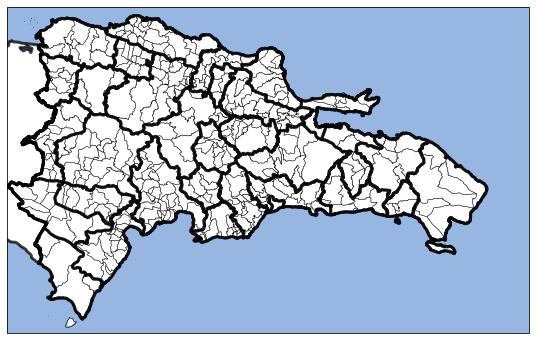

In [6]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(división_prov_muni_y_dist_muni['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(limite_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(silueta_haiti_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(silueta_rd_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)
# ax.add_geometries(RIOS_gdf['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=3, alpha=0.7)


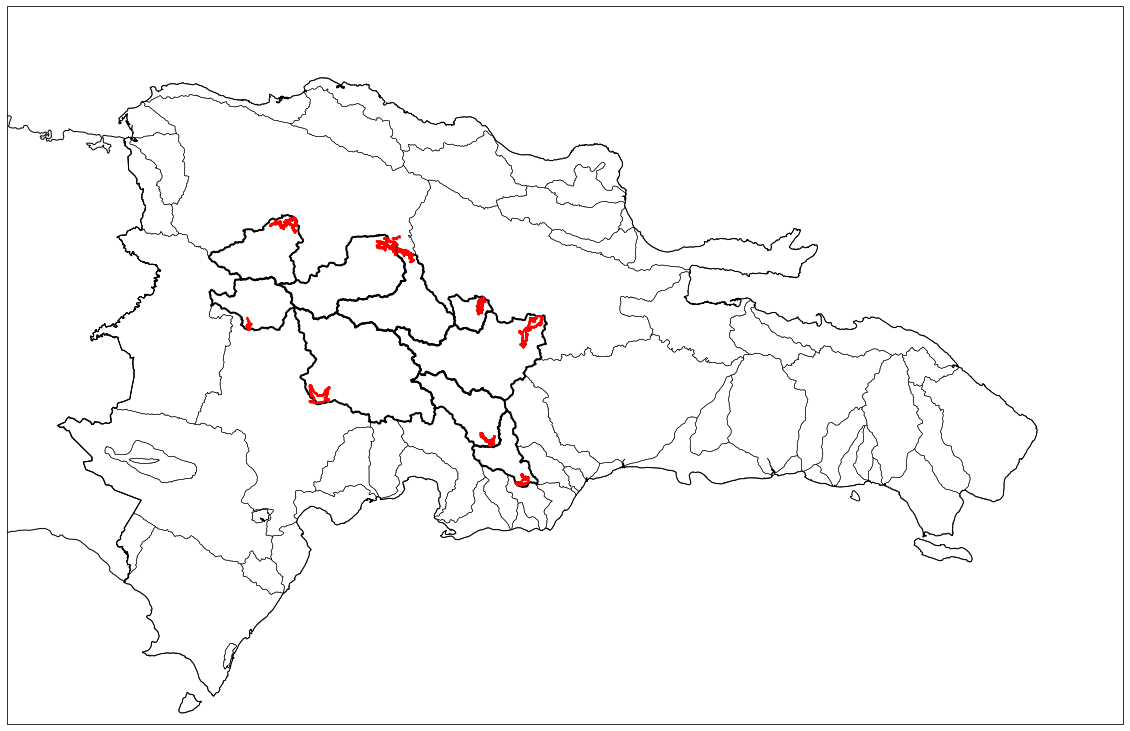

In [7]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72.2, -68, 17.5, 20.2])

cuencas = ['NIZAITO', 'NIZAO', 'YAQUE DEL SUR', 'OZAMA', 'ALTO YUNA', 'HAINA', 'YAQUE DEL NORTE']
#hispaniola_gdf = hispaniola_gdf.loc[hispaniola_gdf['name']      == 'República Dominicana']
cuenca_extracted = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cuencas[6]]

ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=1)
ax.add_geometries(cuencas_hidro_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=0.5)
ax.add_geometries(cuencas_presas_gdf['geometry'][:9], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=2)
ax.add_geometries(cuencas_presas_gdf['geometry'][9:], crs=data_crs, facecolor='none',
                  edgecolor='red', linewidth=2)
# ax.add_geometries(cuenca_extracted['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=2)

Text(0.2, 0.983, 'COMITE DE OPERACION DE PRESAS Y EMBALSES (COPRE) \n    PRONOSTICO DE PRECIPITACION MEDIA EN LA CUENCA\n          DEBIDO AL PASO DE LA TORMENTA TROPICAL GRACE\n                  Domingo 15 de agosto de 2021-7:00 p.m.')

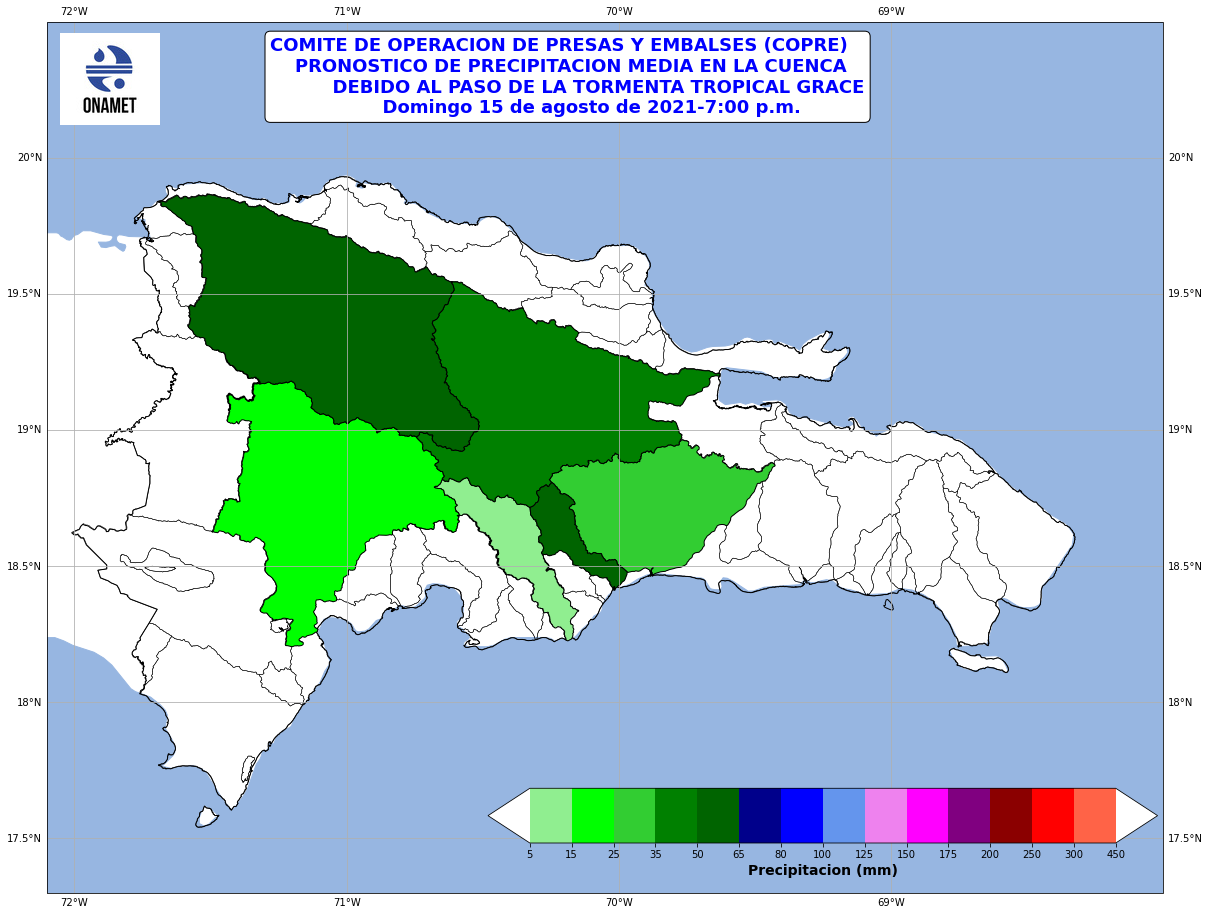

In [20]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72.2, -68, 17.5, 20.2])

cuencas = ['NIZAITO', 'NIZAO', 'YAQUE DEL SUR', 'OZAMA', 'ALTO YUNA', 'HAINA', 'YAQUE DEL NORTE']
cuenca_extracted = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cuencas[6]]

ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=1)
ax.add_geometries(cuencas_hidro_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=0.5)
ax.add_geometries(cuencas_presas_gdf['geometry'][:9], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=2)
ax.add_geometries(cuencas_presas_gdf['geometry'][9:], crs=data_crs, facecolor='none',
                  edgecolor='red', linewidth=2)


grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

ax.set_extent([-72.1, -68, 17.3, 20.5])

# ['lightgreen = 5, 'lime' = 15, 'limegreen' = 25, 'green' = 35, 'darkgreen' = 50 , 'darkblue' = 65, 'blue' = 80, 
#  'royalblue' = 100, 'cornflowerblue' = 125, 'violet' = 150, 'fuchsia' = 175, 'purple' = 200, 'darkred' = 250,
#  'red' = 300, 'tomato' = 450 , 'yellow' = 500]
#[5, 15, 25, 35, 50, 65, 80, 100, 125, 150, 175, 200, 250, 300, 450, 500]

cuencas              = ['NIZAO', 'YAQUE DEL SUR', 'OZAMA', 'ALTO YUNA', 'HAINA', 'YAQUE DEL NORTE']
mean_pp_in_the_basin = {'NIZAO'         : 'lightgreen',
                       'YAQUE DEL SUR'  : 'lime',
                       'OZAMA'          : 'limegreen',
                       'ALTO YUNA'      : 'green',
                       'HAINA'          : 'darkgreen',
                       'YAQUE DEL NORTE': 'darkgreen'}

ax.add_feature(cfeat.OCEAN.with_scale('10m'))
for cc_name in mean_pp_in_the_basin.keys():
    cc_subset = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cc_name]
    ax.add_geometries(cc_subset['geometry'], facecolor=mean_pp_in_the_basin[cc_name],
                     edgecolor='black', crs=data_crs,
                     linewidth=1)

colorbar = imread('colorbar.png')
fig.figimage(colorbar, 380, 0, zorder=100)

logo = imread('onamet-logo.jpg')
fig.figimage(logo, 60, 790, zorder=100)

props = dict(boxstyle='round', facecolor='white', alpha=1)

xtxt = 0.2
ytxt = 0.983
text = 'COMITE DE OPERACION DE PRESAS Y EMBALSES (COPRE) \n    PRONOSTICO DE PRECIPITACION MEDIA EN LA CUENCA\n          DEBIDO AL PASO DE LA TORMENTA TROPICAL GRACE\n                  Domingo 15 de agosto de 2021-7:00 p.m.'
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')
    


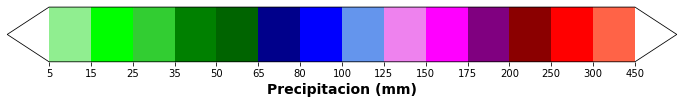

In [9]:
import matplotlib as mpl 

fig, ax = plt.subplots(figsize=(12, 2))
fig.subplots_adjust(bottom=0.5)


cmap = mpl.colors.ListedColormap(['lightgreen', 'lime', 'limegreen', 'green', 'darkgreen', 'darkblue', 'blue', 
                                  'royalblue', 'cornflowerblue', 'violet', 'fuchsia', 'purple', 'darkred',
                                  'red', 'tomato', 'yellow'])
bounds = [5, 15, 25, 35, 50, 65, 80, 100, 125, 150, 175, 200, 250, 300, 450, 500]
cmap.set_over('none')
cmap.set_under('none')
norm = mpl.colors.BoundaryNorm(bounds, cmap.N + 1)
cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds,
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Precipitacion (mm)', fontsize = 14, weight = 'bold')
plt.savefig('colorbar.png', transparent=True)


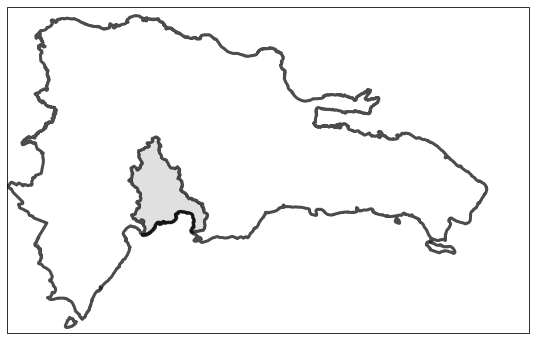

In [10]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72, -68, 17.5, 20])

hispaniola_gdf = hispaniola_gdf.loc[hispaniola_gdf['name']       == 'República Dominicana']
PROVINCIAS_gdf = PROVINCIAS_gdf.loc[PROVINCIAS_gdf['Provincia_'] == 'Azua']

ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)

In [11]:
a = list(silueta_rd_gdf['geometry'][0][76].exterior.coords
        )


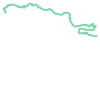

In [12]:
from shapely.geometry import LineString

countries_gdf= geopandas.read_file('../shape_files/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
silueta = countries_gdf.loc[countries_gdf['ADMIN'] == 'Dominican Republic']

p = list(silueta['geometry'])[0][0].exterior.coords[0:200]

line = LineString(p)

line

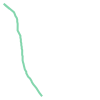

In [13]:
from shapely.geometry import LineString

p = list(silueta_rd_gdf['geometry'])[0][76].exterior.coords[0:50]

line = LineString(p)
line

In [14]:
p = len(list(silueta['geometry'])[0][0].exterior.coords)

p

546

In [15]:
p = len(list(silueta_rd_gdf['geometry'])[0][76].exterior.coords)

p

50887

In [16]:
# for polygon in silueta_rd_gdf['geometry'][0]:  # same for multipolygon.geoms
#     print(polygon)
#     #shapely.ops.split(polygon, breakingpoints_rd_2021_reordered.iloc[0:2])